# Ceteris Paribus (ICE)

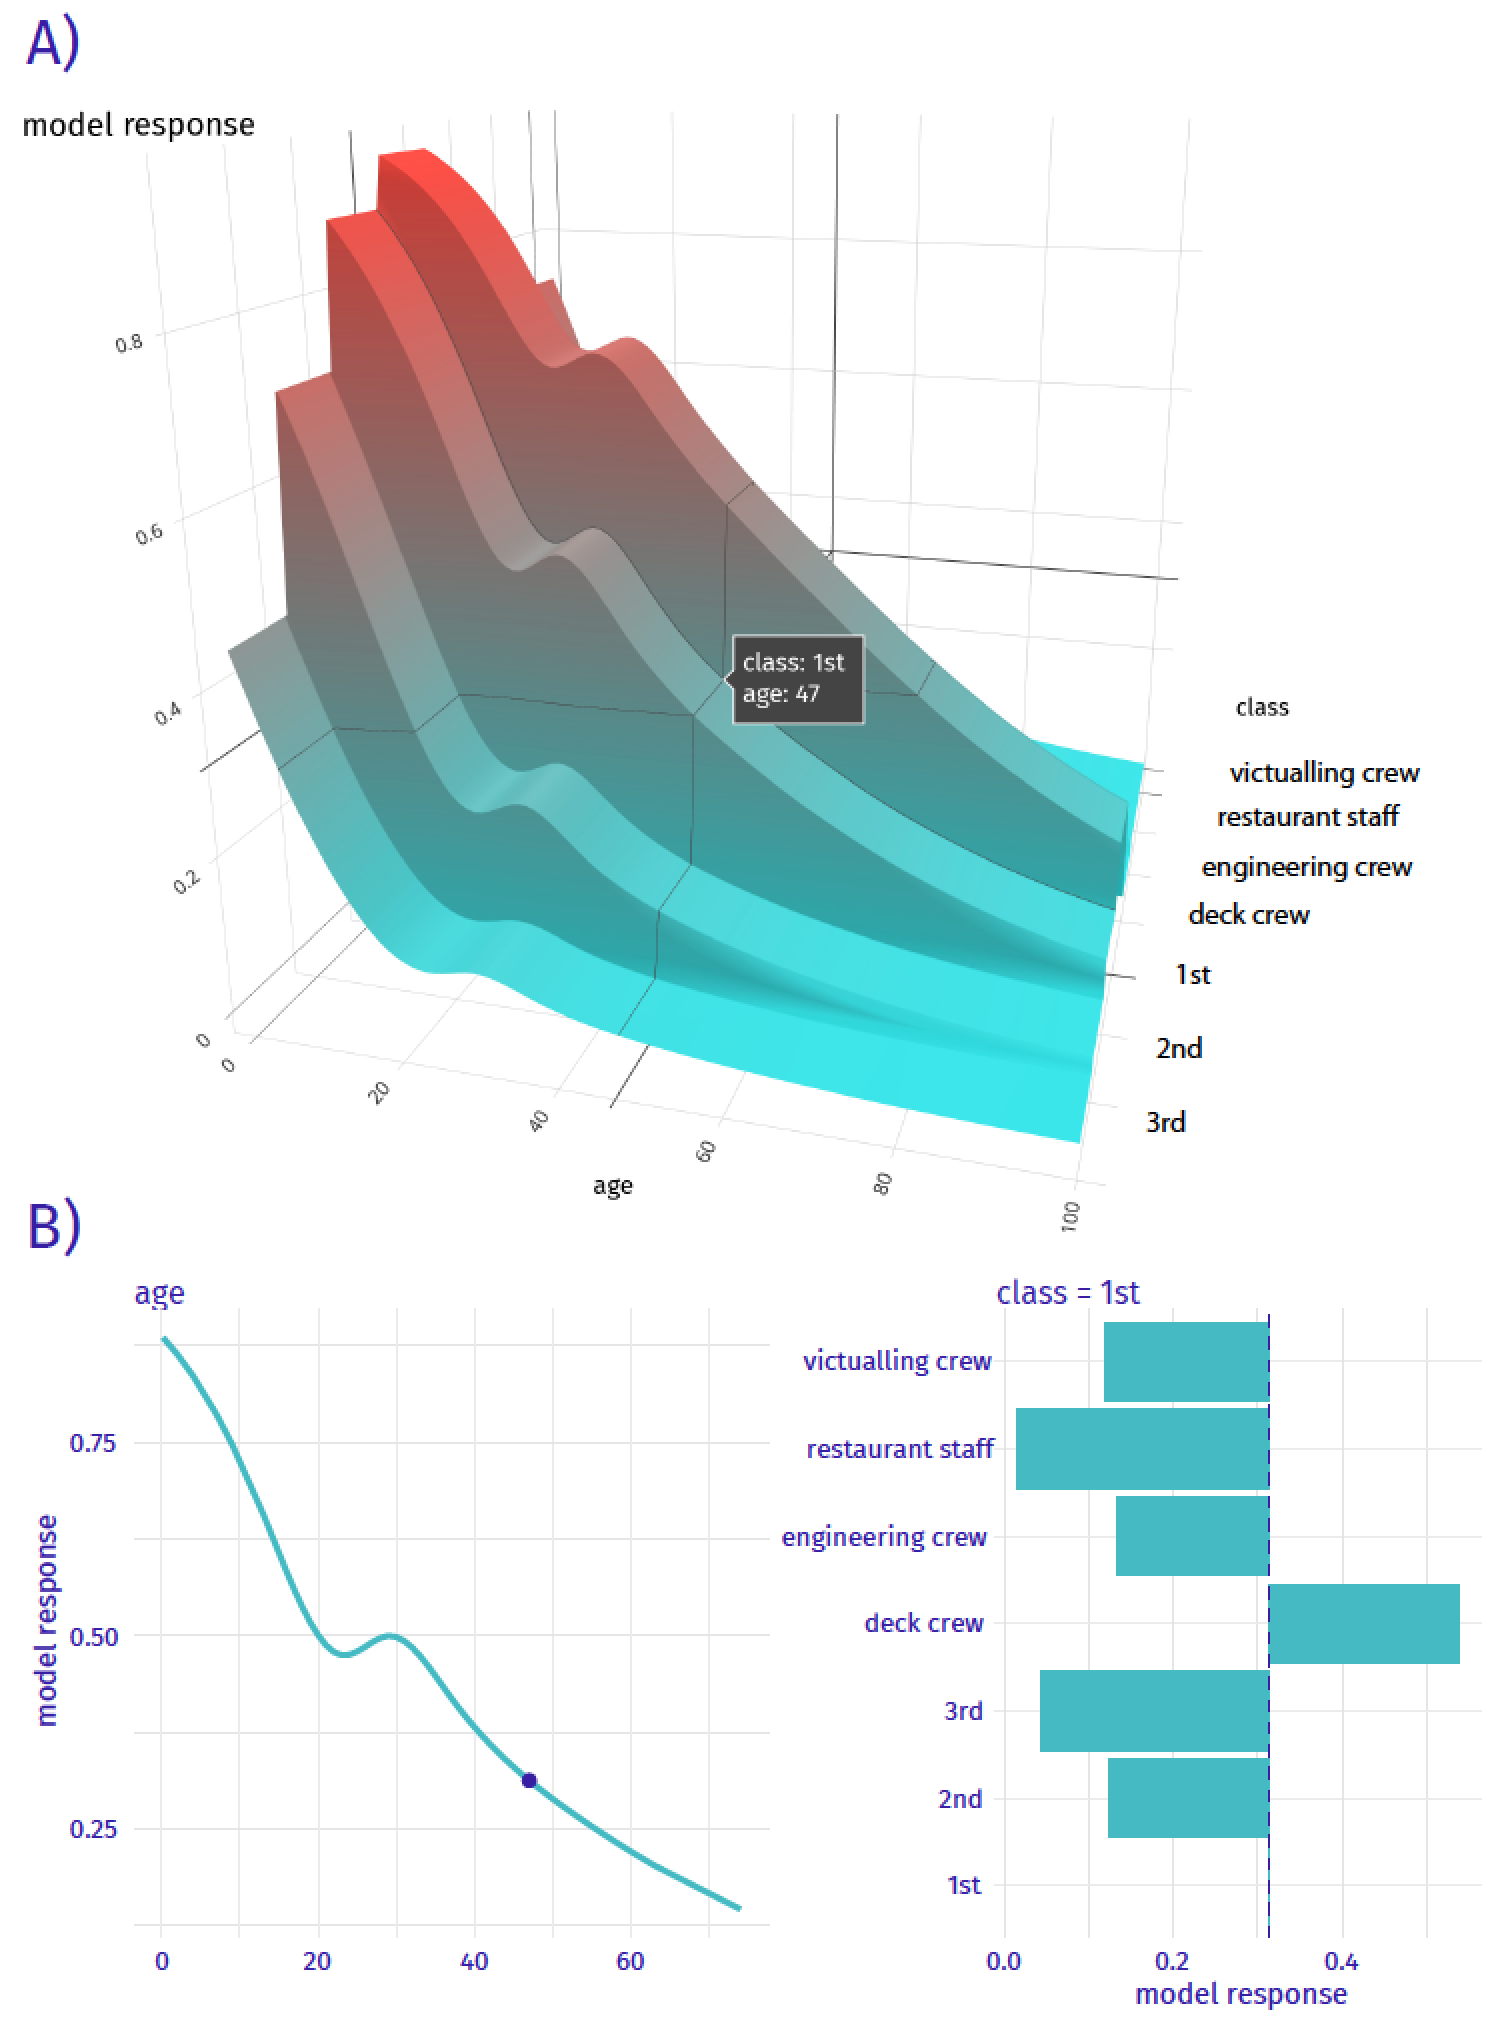

https://ema.drwhy.ai/ceterisParibus.html

## Zalety
 * Proste i jednolite podejście do ekspolracji modelu
 * Przystępna graficzna reprezentacja
 * Możliwość porównania wyjaśnień kilku modeli
 * Łatwa rozszerznalność
 
## Wady
 * **Wrażliwy na zmienne skorelowane**
 * Wrażliwy na interakcje

In [1]:
data(titanic_imputed, package = "DALEX")

model <- ranger::ranger(survived~., data = titanic_imputed, classification = TRUE, probability = TRUE)

In [3]:
library(mlr)
titanic_imputed_fct <- titanic_imputed
titanic_imputed_fct$survived <- as.factor(titanic_imputed_fct$survived)

classif_task <- makeClassifTask(data = titanic_imputed_fct, target = "survived")
classif_lrn <- makeLearner("classif.svm", predict.type = "prob")
model_mlr <- train(classif_lrn, classif_task)

In [5]:
library(DALEX)
library(DALEXtra)
explainer <- DALEX::explain(model = model,
                     data = titanic_imputed[,-8],
                     y = titanic_imputed$survived)

Preparation of a new explainer is initiated
  -> model label       :  ranger  (  default  )
  -> data              :  2207  rows  7  cols 
  -> target variable   :  2207  values 
  -> predict function  :  yhat.ranger  will be used (  default  )
  -> predicted values  :  No value for predict function target column. (  default  )
  -> model_info        :  package ranger , ver. 0.12.1 , task classification (  default  ) 
  -> predicted values  :  numerical, min =  0.01122123 , mean =  0.3229532 , max =  0.9936315  
  -> residual function :  difference between y and yhat (  default  )
  -> residuals         :  numerical, min =  -0.7825083 , mean =  -0.000796433 , max =  0.8896394  
  A new explainer has been created!  


In [6]:
explainer_mlr <- explain_mlr(model = model_mlr,
                         data = titanic_imputed_fct[,-8],
                         y = as.numeric(as.character(titanic_imputed_fct$survived)))

Preparation of a new explainer is initiated
  -> model label       :  WrappedModel  (  default  )
  -> data              :  2207  rows  7  cols 
  -> target variable   :  2207  values 
  -> predict function  :  yhat.WrappedModel  will be used (  default  )
  -> predicted values  :  No value for predict function target column. (  default  )
  -> model_info        :  package mlr , ver. 2.19.0 , task classification (  default  ) 
  -> predicted values  :  numerical, min =  0.08555467 , mean =  0.3241941 , max =  0.9609426  
  -> residual function :  difference between y and yhat (  default  )
  -> residuals         :  numerical, min =  -0.8663467 , mean =  -0.002037356 , max =  0.9075728  
  A new explainer has been created!  


In [7]:
new_obs_1 <- titanic_imputed[11, -8]
new_obs_2 <- titanic_imputed[29, -8]

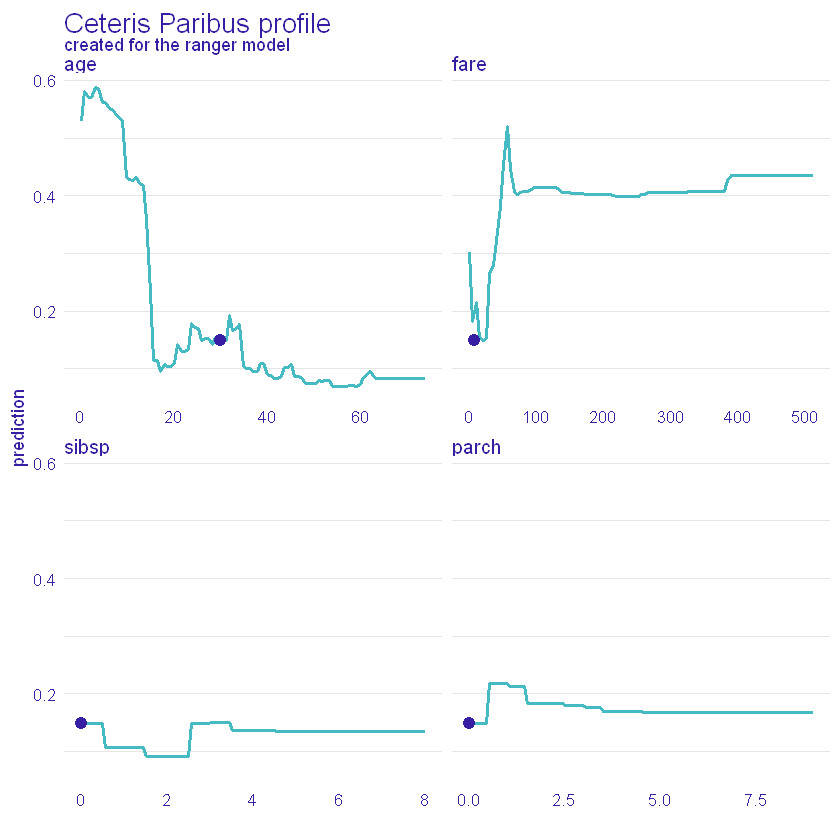

In [8]:
cp_titanic_ranger <- predict_profile(explainer,
                                     new_obs_1)
plot(cp_titanic_ranger)

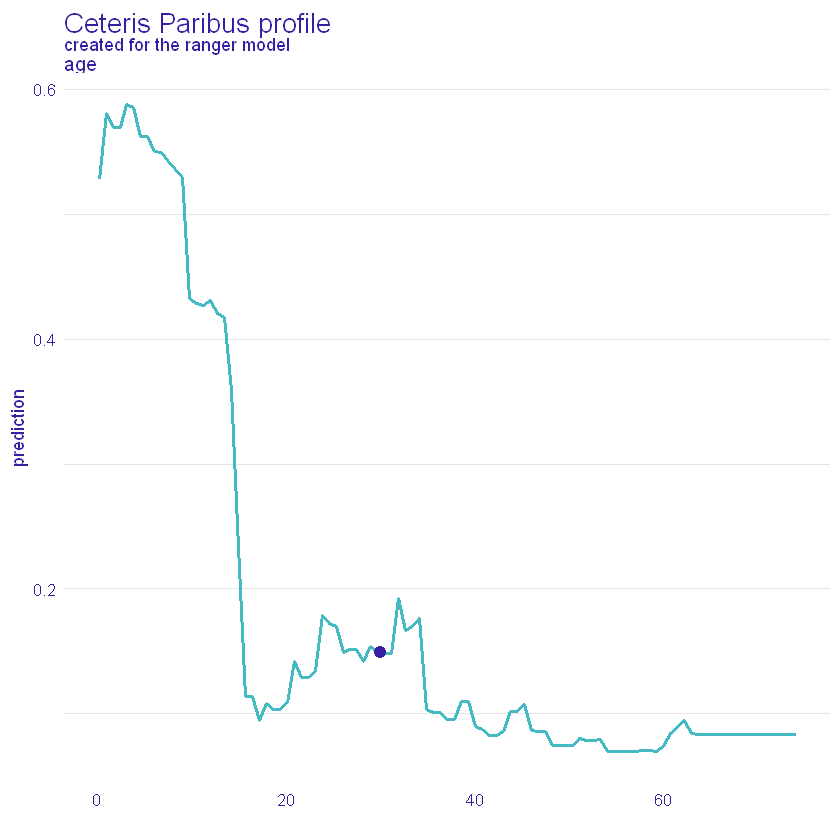

In [9]:
cp_titanic_ranger <- predict_profile(explainer,
                                    new_obs_1,
                                    variables = "age")
plot(cp_titanic_ranger, variables = "age")

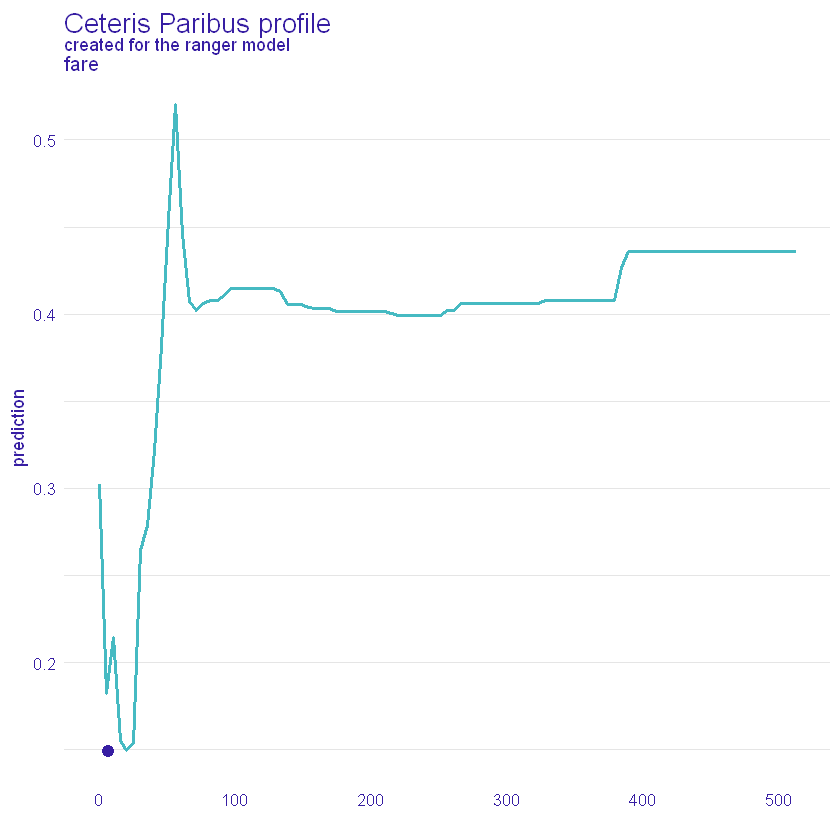

In [10]:
cp_dalex <- predict_profile(explainer, 
                            new_observation = new_obs_1, 
                            variables = "fare", 
                            grid_points = 101)
plot(cp_dalex, variables = "fare")

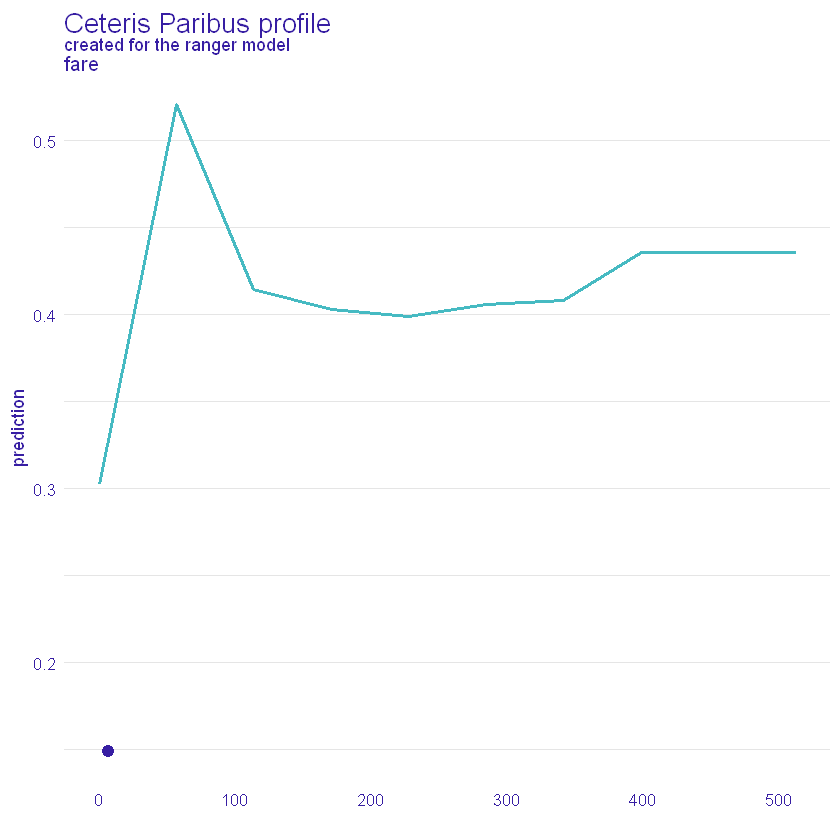

In [11]:
cp_dalex <- predict_profile(explainer, 
                            new_observation = new_obs_1, 
                            variables = "fare", 
                            grid_points = 10)
plot(cp_dalex, variables = "fare")

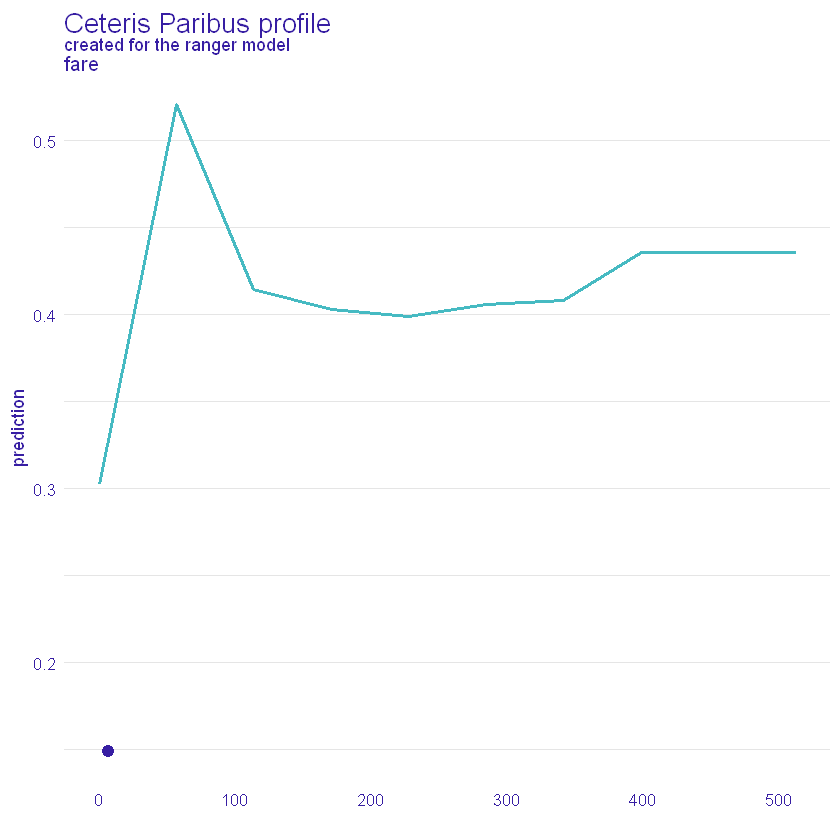

In [12]:
cp_dalex_uni <- predict_profile(explainer, 
                            new_observation = new_obs_1, 
                            variables = "fare", 
                            grid_points = 201)
plot(cp_dalex, variables = "fare")

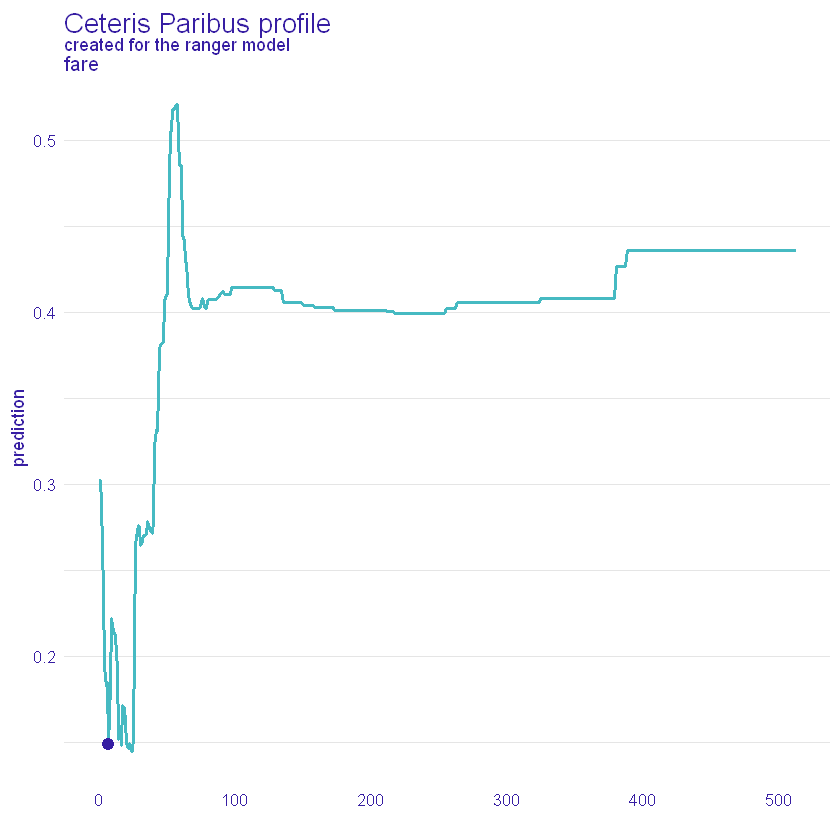

In [13]:
cp_dalex_qua <- predict_profile(explainer, 
                            new_observation = new_obs_1, 
                            variables = "fare", 
                            grid_points = 501,
                            variable_splits_type = "uniform")
plot(cp_dalex_qua, variables = "fare")

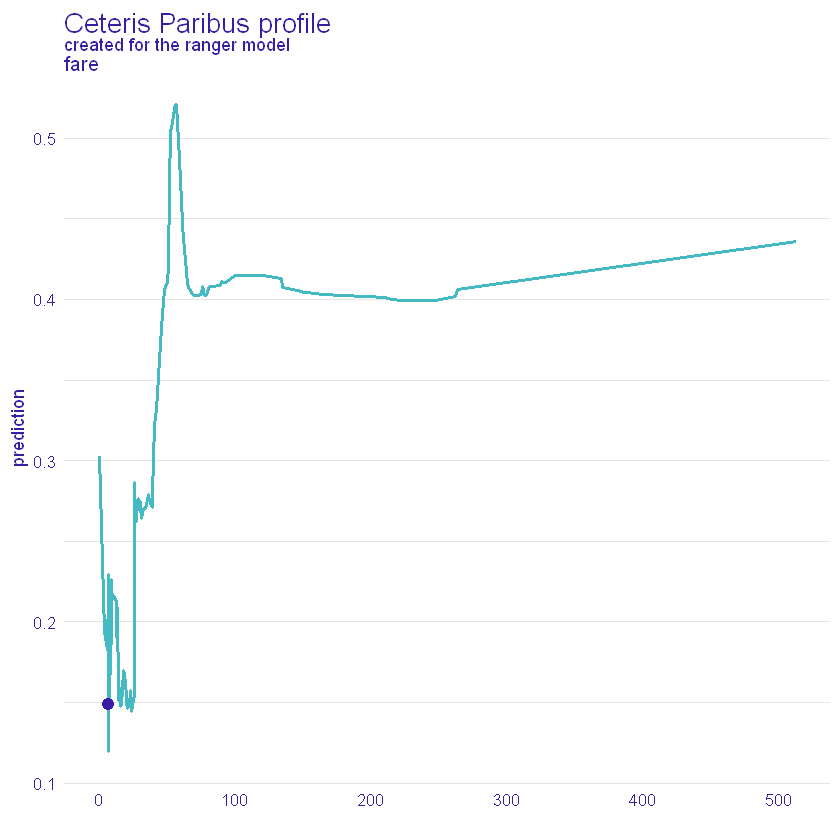

In [14]:
cp_dalex_qua <- predict_profile(explainer, 
                            new_observation = new_obs_1, 
                            variables = "fare", 
                            grid_points = 501,
                            variable_splits_type = "quantiles")
plot(cp_dalex_qua, variables = "fare")

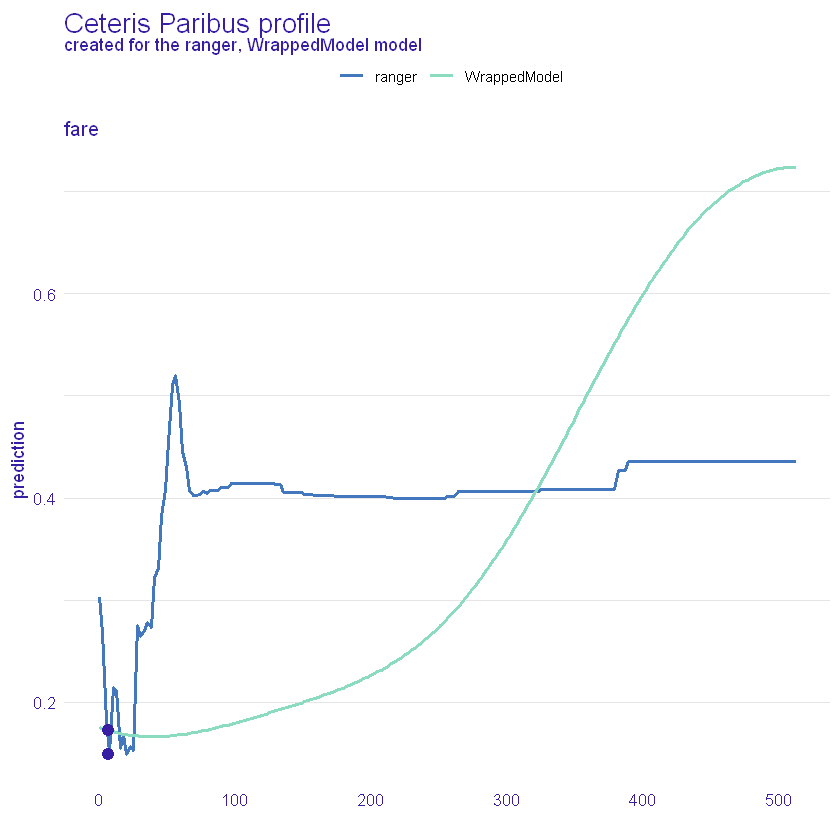

In [15]:
cp_dalex_ranger <- predict_profile(explainer, 
                            new_observation = new_obs_1, 
                            variables = "fare", 
                            grid_points = 201)

cp_dalex_mlr <- predict_profile(explainer_mlr, 
                            new_observation = new_obs_1, 
                            variables = "fare", 
                            grid_points = 201)

plot(cp_dalex_ranger, cp_dalex_mlr, variables = "fare")

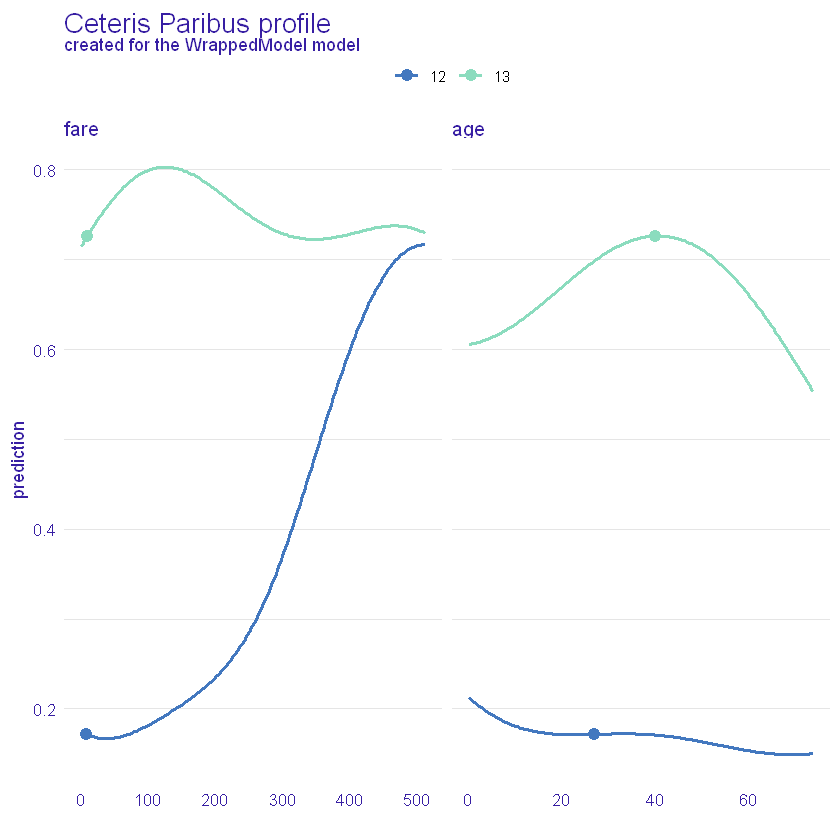

In [16]:
cp_dalex_mlr <- predict_profile(explainer_mlr, 
                            new_observation = titanic_imputed[12:13,], 
                            variables = c("fare", "age"), 
                            grid_points = 201)

plot(cp_dalex_mlr, variables = c("fare", "age"), color = "_ids_")

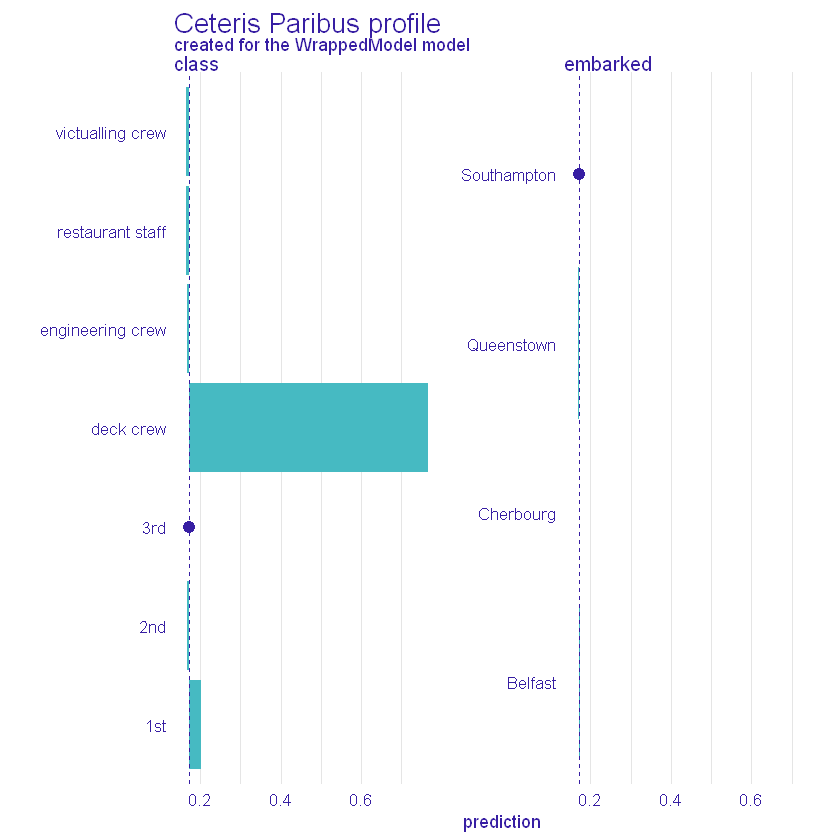

In [17]:
cp_dalex_mlr <- predict_profile(explainer_mlr, 
                            new_observation = titanic_imputed[12,], 
                            variables = c("class", "embarked"))

plot(cp_dalex_mlr, variables = c("class", "embarked"), variable_type = "categorical", categorical_type = "bars")

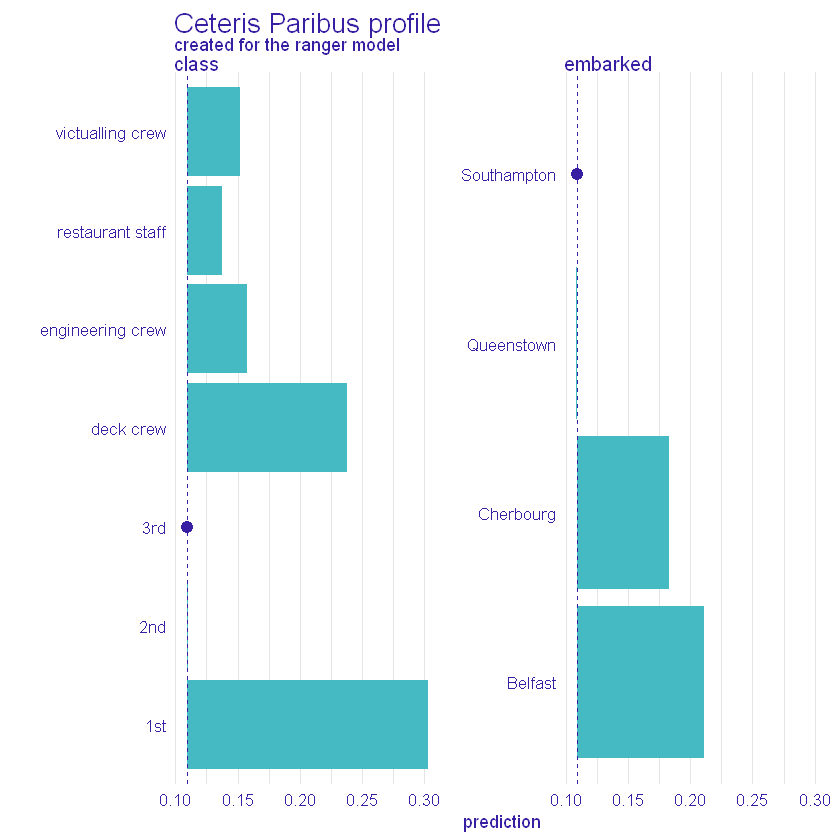

In [18]:
cp_dalex <- predict_profile(explainer, 
                            new_observation = titanic_imputed[12,], 
                            variables = c("class", "embarked"))

plot(cp_dalex, variables = c("class", "embarked"), variable_type = "categorical", categorical_type = "bars")